In [35]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True):
    # cwd = os.getcwd() + "images"
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    # mode = "a" if os.path.exists(path) else "w"
    print("saving figure", fig_id)
    # 新建目录 不然也会报错
    # 新建png文件 不然找不到该文件会报错 chapter_id 手动创建
    if not os.path.isdir(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)):
        os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID))
    if not os.path.exists(path):
        with open(path, 'w'):
            pass
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format="png", dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [18]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
DOWNLOAD_PATH = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_data(url=DOWNLOAD_PATH, data_path=HOUSING_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    tgz_path = os.path.join(data_path, "housing.tgz")
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_path)
    housing_tgz.close()

In [19]:
import ssl
# 没有下面的 会报错: SSL certification
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context
fetch_data()

In [20]:
import pandas as pd
housing = pd.read_csv(os.path.join(HOUSING_PATH, "housing.csv"))

In [25]:
# housing.head()
# housing.info()
# housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


saving figure attribute_histogram_plots


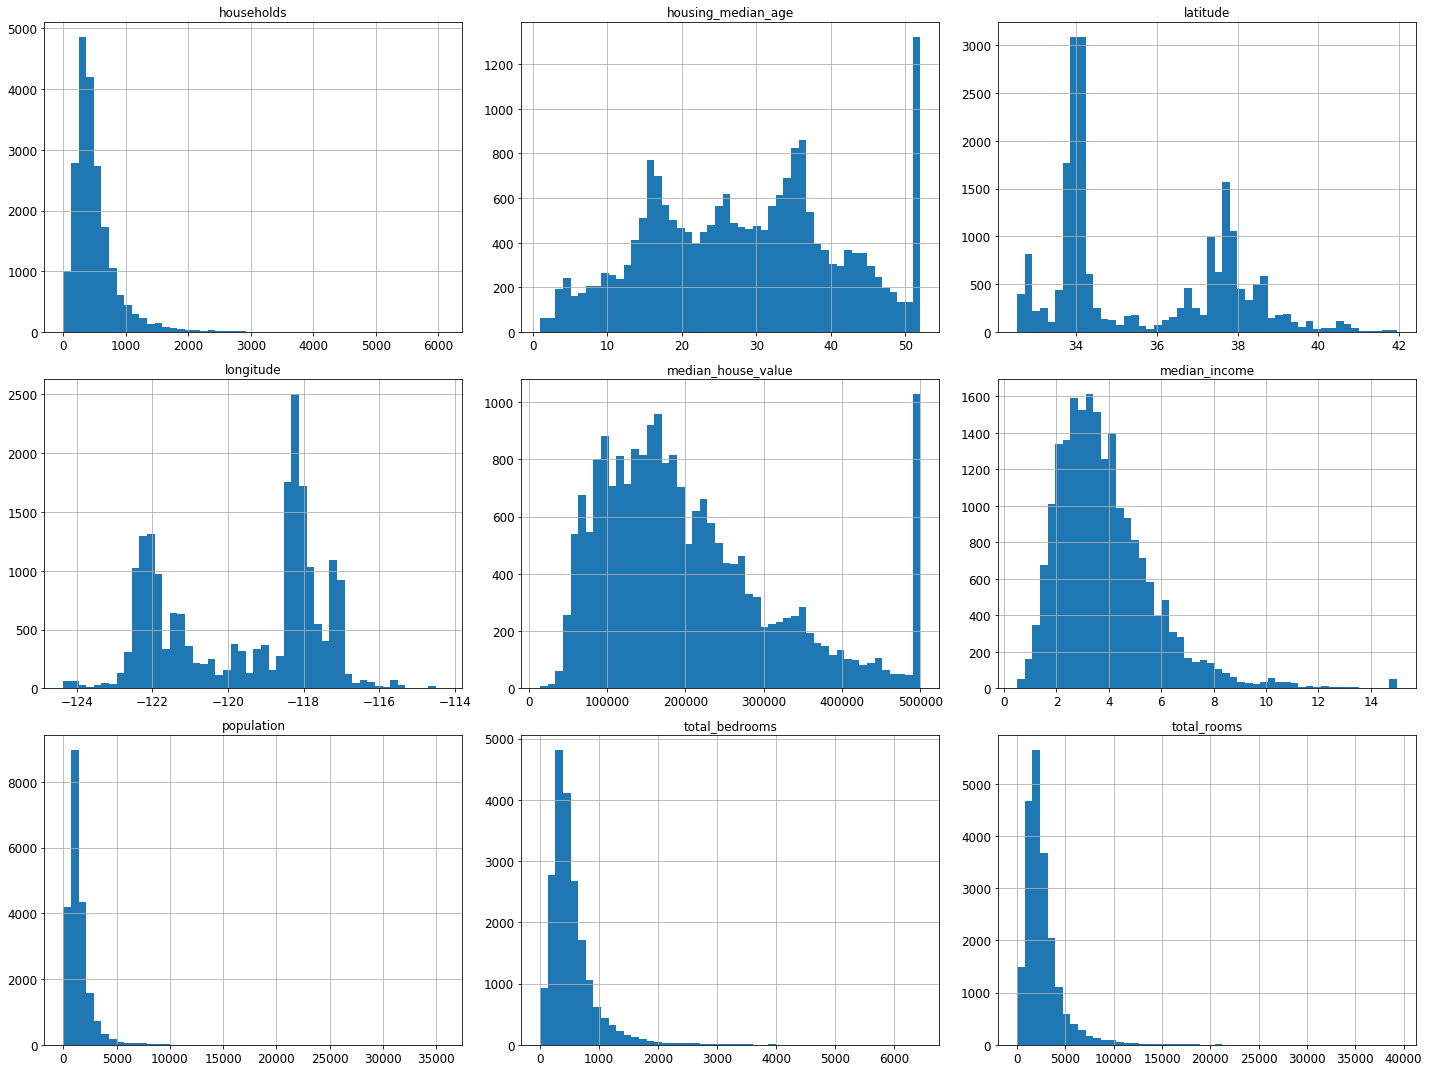

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
# plt.show()

In [40]:
np.random.seed(42)

In [45]:
from zlib import crc32

In [66]:
# crc checksum算法 32bit 均匀分布 
# &0xffffffff是为了保证python2/3的兼容性 p2 会返回signed整型数 &后 -> 2^32内
def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

def train_test_split_by_id(data, test_ratio, id_col):
    ids = data[id_col]
    in_test = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data[~in_test], data[in_test]

In [67]:
housing_with_id = housing.reset_index()
train_set, test_set = train_test_split_by_id(housing_with_id, 0.1, "index")

In [77]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = train_test_split_by_id(housing_with_id, 0.2, "id")

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [83]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [64]:
# print(len(test_set) / len(housing)) # 0.2: test占总的样本比例

0.2


In [78]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

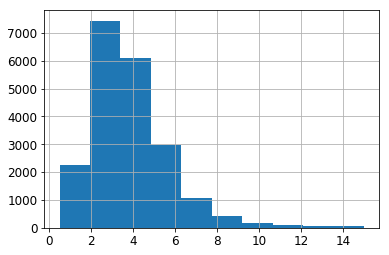

In [81]:
housing["median_income"].hist()

In [85]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3., 4.5, 6., np.inf], labels=[1,2,3,4,5])

In [87]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

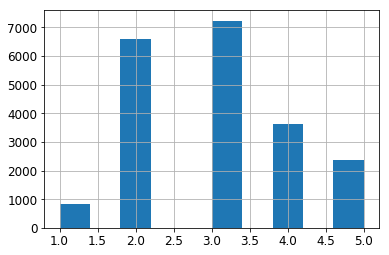

In [88]:
housing["income_cat"].hist()

In [101]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

# stratifiedshufflesplit 分层抽样: 保证train test set 每个收入等级比例和原来样本一样
# n_splits 分出一个train test set 如果交叉验证 默认值为10 split完有10个np array（每个包含训练/测试集的index）
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    # print(len(_))
    # index 为数字 loc & iloc 都一样
    strat_train_set = housing.loc[train_index] # pass the copy or ref? copy!
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [116]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

KeyError: "['income_cat'] not found in axis"

In [115]:
strat_test_set.head() # test set不动

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


#### 一些图

In [468]:
housing = strat_train_set.copy() # 动housing不改变stratxx

In [135]:
np.linspace(1,2,11)  # start, end, sample_nums

's m'

saving figure bad_visualization_plot


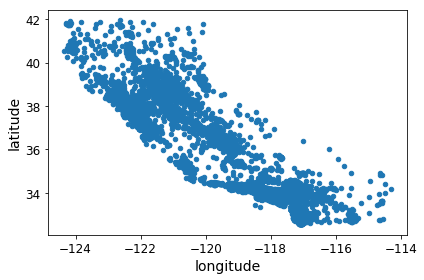

In [137]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

saving figure better_visualization_plot


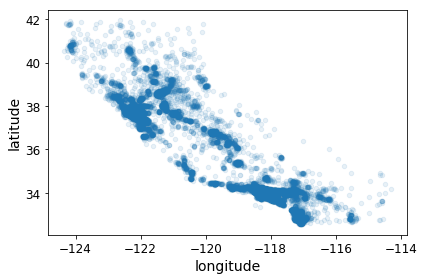

In [138]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

saving figure housing_price_scatter


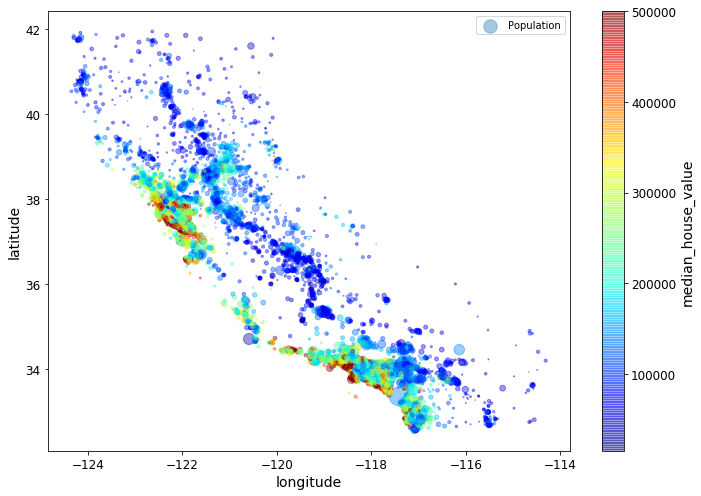

In [147]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="Population", 
            figsize=(10, 7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
save_fig("housing_price_scatter")

saving figure california_housing_price_plot


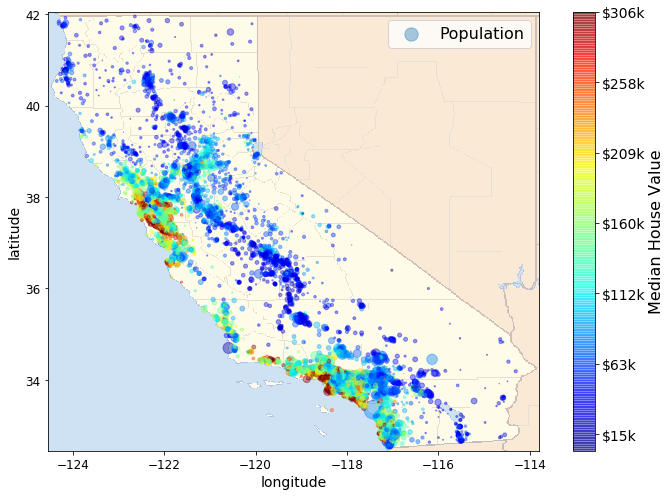

In [176]:
import matplotlib.image as mpimg

california_img = mpimg.imread(PROJECT_ROOT_DIR + "/images/end_to_end_project/california.png")
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize = (10, 7), alpha=0.4,
                  s=housing["population"]/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([f"${round(v/1000):.0f}k" for v in tick_values], fontsize=14) # round(x) 应该是int why报错？->.0f
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_price_plot")
plt.show()

In [177]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

saving figure scatter_matrix_plot


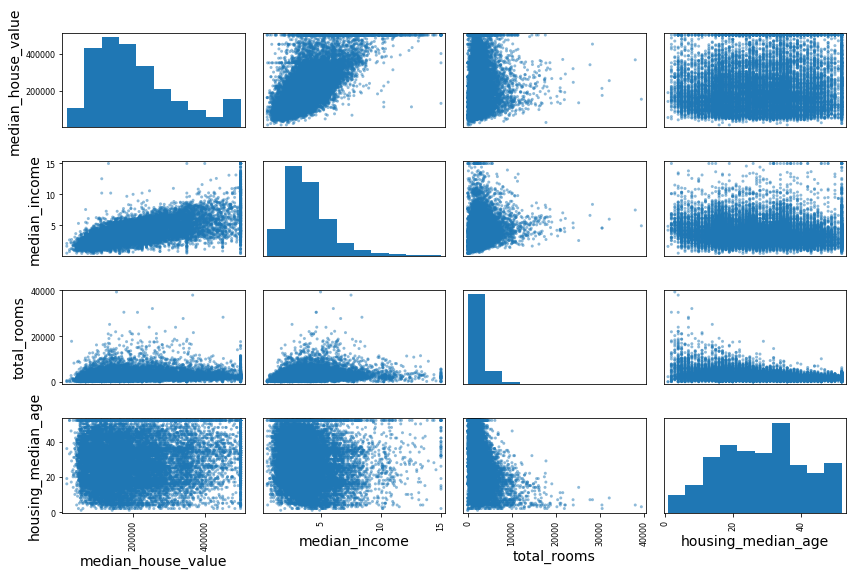

In [178]:
from pandas.plotting import scatter_matrix
attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attr], figsize=(12, 8))
save_fig("scatter_matrix_plot")

saving figure income_vs_housing_value_scatterplot


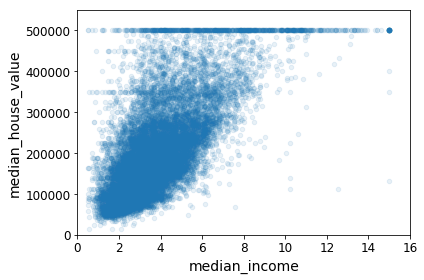

In [180]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_housing_value_scatterplot")

In [181]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [182]:
# 特征工程
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] # 平均一家有多少房间
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [183]:
cor_matrix = housing.corr()
cor_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#  数据清洗预处理

In [189]:
# 准备train set的data和label
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [192]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [193]:
# 直接drop掉na的行
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [194]:
# 直接drop掉整列 drop 也只是返回copy 不改变原值
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [196]:
# 用该列median填充na
median = housing["total_bedrooms"].median()
samle_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
samle_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [200]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# median只能用在数值列
housing_num = housing.drop("ocean_proximity", axis=1)

In [203]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [204]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [206]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [210]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index.values) # index是ndarray就行了 不用list
housing_tr.loc[samle_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [224]:
housing_cat = housing[["ocean_proximity"]] # [] -> DataFrame
from sklearn.preprocessing import OrdinalEncoder
ordial_encoder = OrdinalEncoder()
housing_tr = ordial_encoder.fit_transform(housing_cat) # -> ndarray
ordial_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [235]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_tr = cat_encoder.fit_transform(housing_cat)
housing_tr.toarray().shape # sparse array -> ndarray or OneHotEncoder(sparse=False)
cat_encoder.categories_[0].shape

(5,)

### pipeline处理

In [254]:
from sklearn.preprocessing import FunctionTransformer

# 不用手動指定index了，更robust
rooms_ix, bedrooms_ix, population_ix, household_ix = [list(housing.columns).index(col)
                                                      for col in ["total_rooms", "total_bedrooms", "population", "households"]]
def add_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household] # np.c_[]!, () is callable
    
attr_adder = FunctionTransformer(add_features, validate=False, kw_args={"add_bedrooms_per_room": False})

In [253]:
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [258]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns) +
                                     ["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [294]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attr_adder", FunctionTransformer(add_features, validate=False)),
    ("std_scaler", StandardScaler())
])

In [295]:
num_pipeline.fit_transform(housing_num).shape

(16512, 11)

In [296]:
from sklearn.compose import ColumnTransformer

In [304]:
nums_attr = list(housing_num) # list(DF) -> [columns]
cat_attr = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, nums_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [298]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [299]:
housing_prepared.shape

(16512, 16)

### 选择和训练模型

In [284]:
type(housing_labels)

pandas.core.series.Series

In [300]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_perpared, housing_labels) # series也能用
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) # 处理成模型需要的input

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [301]:
print("labels:", list(some_labels)) # series -> list

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [302]:
from sklearn.metrics import mean_squared_error

pred = lin_reg.predict(housing_perpared)
lin_mse = mean_squared_error(housing_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [303]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, pred)
lin_mae

49439.89599001897

In [305]:
# 决策树回归 过拟合
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [307]:
pred = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_labels, pred))
tree_rmse

0.0

In [308]:
# fine-tune 模型（在各个粗糙的模型结果上微调）
# 交叉验证
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [323]:
def display_scores(score):
    print("Scores:", [f"{s:.2f}" for s in score])
    print("Mean:", f"{score.mean():.2f}")
    print("Standard deviation:", f"{score.std():.2f}")
    
display_scores(tree_rmse_scores)

Scores: ['68238.05', '66817.05', '70753.17', '69884.29', '70568.69', '74169.72', '71656.23', '70466.18', '76555.54', '69481.85']
Mean: 70859.08
Standard deviation: 2652.36


In [324]:
lin_scores = cross_val_score(lin_reg, housing_perpared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: ['66782.74', '66960.12', '70347.95', '74739.57', '68031.13', '71193.84', '64969.63', '68281.61', '71552.92', '67665.10']
Mean: 69052.46
Standard deviation: 2731.67


In [350]:
# 集成学习
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, pred)
print("RMSE:", f"{np.sqrt(forest_mse):.2f}")


RMSE: 21933.31


In [331]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores) # scoring是-MSE！
display_scores(forest_rmse_scores) # 随机森林 适合样本多？cv后

Scores: ['51646.45', '48940.60', '53050.86', '54408.99', '50922.15', '56482.51', '51864.52', '49760.85', '55434.22', '53326.10']
Mean: 52583.72
Standard deviation: 2298.35


In [351]:
# 测试集上的表现和cv的结果类似
test_data = strat_test_set.drop("median_house_value", axis=1)
test_label = strat_test_set["median_house_value"].copy()
test_data_prepared = full_pipeline.transform(test_data)

In [352]:
test_pred = forest_reg.predict(test_data_prepared)
pred_rmse = np.sqrt(mean_squared_error(test_label, test_pred))
pred_rmse

50920.16461767346

In [355]:
# 随机森林预测结果明显高于线性回归、支持向量回归
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse = np.sqrt(-scores)
pd.Series(lin_rmse).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

In [356]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
pred = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, pred)
svm_rmse = np.sqrt(svm_mse)
print(svm_rmse)

111094.6308539982


##### gird-search 随机森林参数寻优

In [357]:
from sklearn.model_selection import GridSearchCV
# RandomizedSearchCV 可以搜索更多的组合
para_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2,4,6,8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2,4,6]},
] # bootstrap 采样方法 默认True 即有放回的采样

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, para_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [358]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [359]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [372]:
cvres = grid_search.cv_results_
cvres.keys()
for mse, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"{np.sqrt(-mse):.2f}", params)

63669.06 {'max_features': 2, 'n_estimators': 3}
55627.16 {'max_features': 2, 'n_estimators': 10}
53384.58 {'max_features': 2, 'n_estimators': 30}
60965.99 {'max_features': 4, 'n_estimators': 3}
52740.98 {'max_features': 4, 'n_estimators': 10}
50377.34 {'max_features': 4, 'n_estimators': 30}
58663.85 {'max_features': 6, 'n_estimators': 3}
52006.15 {'max_features': 6, 'n_estimators': 10}
50146.47 {'max_features': 6, 'n_estimators': 30}
57869.26 {'max_features': 8, 'n_estimators': 3}
51711.09 {'max_features': 8, 'n_estimators': 10}
49682.25 {'max_features': 8, 'n_estimators': 30}
62895.09 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57490.61 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51009.51 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
56951.60 {'bootstrap': False, 'max_features': 6, 'n_estimators': 3}
51174.48 {'bootstrap': False, 'max_features': 6, 'n_estimators': 10}


In [373]:
pd.DataFrame(grid_search.cv_results_) # dic -> DataFrame

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047258,0.003397,0.002820,0.000177,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053749e+09,1.519609e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.146430,0.003233,0.007880,0.001456,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094381e+09,1.327046e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,0.461823,0.013156,0.021350,0.001635,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626879e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.074568,0.000764,0.002558,0.000058,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716852e+09,1.631421e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.247518,0.003906,0.007358,0.000130,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781611e+09,1.268562e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07
5,0.751765,0.015178,0.021168,0.000714,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.387153e+09,-2.588448e+09,...,-2.537877e+09,1.214603e+08,3,-3.838835e+08,-3.880268e+08,-3.790867e+08,-4.040957e+08,-3.845520e+08,-3.879289e+08,8.571233e+06
6,0.101208,0.004131,0.002464,0.000068,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.119657e+09,-3.586319e+09,...,-3.441447e+09,1.893141e+08,15,-9.245343e+08,-8.886939e+08,-9.353135e+08,-9.009801e+08,-8.624664e+08,-9.023976e+08,2.591445e+07
7,0.331765,0.002820,0.007151,0.000329,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.549663e+09,-2.782039e+09,...,-2.704640e+09,1.471542e+08,7,-4.980344e+08,-5.045869e+08,-4.994664e+08,-4.990325e+08,-5.055542e+08,-5.013349e+08,3.100456e+06
8,1.044463,0.015583,0.020559,0.000581,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.370010e+09,-2.583638e+09,...,-2.514668e+09,1.285063e+08,2,-3.838538e+08,-3.804711e+08,-3.805218e+08,-3.856095e+08,-3.901917e+08,-3.841296e+08,3.617057e+06
9,0.128512,0.001302,0.002709,0.000238,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.353504e+09,-3.348552e+09,...,-3.348851e+09,1.241864e+08,14,-9.228123e+08,-8.553031e+08,-8.603321e+08,-8.881964e+08,-9.151287e+08,-8.883545e+08,2.750227e+07


In [401]:
feature_importances = grid_search.best_estimator_.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_onehot_attribs = list(cat_encoder.categories_[0])
attributes = nums_attr + extra_attribs + cat_onehot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

In [470]:
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [ ]:
#### 评估gridserch的模型在测试集上的表现
# 一般来说 超参数调节会导致测试集上预测准确度较之前的cv预测结果有所下降，因为训练集上容易发生过拟合
final_model = grid_search.best_estimator_
final_pred = final_model.predict(test_data_prepared)
final_mse = mean_squared_error(test_label, final_pred)
print("final rmse", np.sqrt(final_mse))

###### rmse置信区间计算

In [407]:
from scipy import stats

final_model = grid_search.best_estimator_
# X_test = strat_test_set.drop("median_house_value", axis=1)
# y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(test_data)
# final_model.fit(X_test_prepared, y_test) SB 模型都训练ok了 直接predict
test_pred = final_model.predict(X_test_prepared)
print("final rmse:", np.sqrt(mean_squared_error(test_label, test_pred)))

final rmse: 47730.22690385927


array([5.80762381e+09, 7.41812732e+09])

* [t-score vs z-score](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/)
* [SE标准误差](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/standard-error-of-the-mean): sigma/sqrt(n)


In [412]:
# We can compute a 95% confidence interval for the test RMSE ?
confidence = 0.95
squared_errors = (test_pred - test_label) ** 2
mean = squared_errors.mean()

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=mean,
                         scale=stats.sem(squared_errors)))  
# stats.sem: standard error of mean(se: 标准误差) -> (x_hat - mu_of_x) / sem ~ t(m-1, confidence)
# 即有95%的概率 预测误差在该区间内

array([45685.10470776, 49691.25001878])

In [426]:
# 带有predict的pipeline
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(housing.iloc[:5])

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

####  model persistence with joblib

In [427]:
from sklearn.externals import joblib

joblib.dump(full_pipeline_with_predictor, "final_model.pkl")
model_loaded =  joblib.load("final_model.pkl")

['final_model.pkl']

#### 随机gridsearch里面的一些分布函数 geom，[expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)
#### 概率论知识 [pdf vs pmf](https://www.quora.com/What-is-the-difference-of-PMF-and-PDF-in-probability)

In [436]:
from scipy.stats import geom, expon, reciprocal

# stats里面还有个reciprocal分布，概率密度函数f(x, a, b) = 1/(x*log(b/a) 分布函数是对数函数？
geon_distrib = geom(0.5).rvs(10000, random_state=42) # 指数分布 pdf为 e^(-x)
expon_distrib = expon(scale=1).rvs(10000, random_state=42) # 几何分布 pmf为 (1-p)^(k-1) * p (p为形状参数) aka 离散型随机变量的分布律

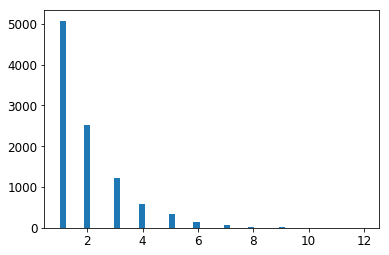

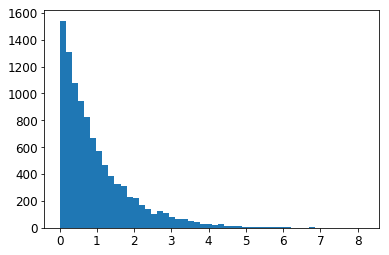

In [429]:
plt.hist(geon_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

In [ ]:
# 随机gridsearch: Randomized search tends to find better hyperparameters than grid search in the same amount of time.

In [433]:
# np.log(np.e) e based log

1.0

#### 超参数调节时参数的分布选择

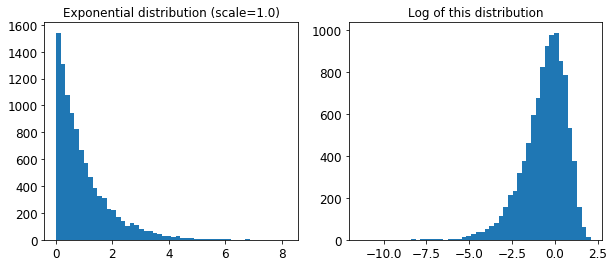

In [434]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

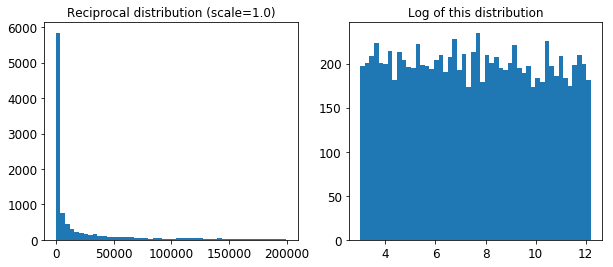

In [437]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

In [449]:
# np.argpartition用法 返回的是index partition的元素的位置左侧都<=该元素,右侧都大于该元素
a = np.array([3,5,2,7,3,4,9,1,8])
a[np.argpartition(a, -5)][-5:]

array([0, 3, 0, 3, 3, 4, 4, 4, 5, 8, 6, 9, 9, 9])

#### 可以在数据准备阶段筛选出top特征的transformer

In [477]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [478]:
k =5
top_k_indices = indices_of_top_k(feature_importances, k)
top_k_indices

array([ 0,  1,  7,  9, 12])

In [462]:
np.array(attributes)[top_k_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [463]:
sorted(zip(feature_importances, attributes), reverse=True)[:5]

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude')]

In [479]:
# make new Pipeline with feature selection added
# Pipeline是tuple数组
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(
])

In [480]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [481]:
housing_prepared_top_k_features[:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [482]:
housing_prepared[:3, top_k_indices]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [ ]:
# Try creating a single pipeline that does the full data preparation plus the final prediction：加上预测

In [ ]:
# Automatically explore some preparation options using GridSearchCV：加上调节超参数